## NeuroMuscular Monitoring


In [129]:
import pandas as pd

neuro=pd.read_csv("Neuromuscular_monitoring_data.csv")

In [130]:
neuro.head()

,PK,ExpSevo,InspSevo,TOF,Count,Esmeron,Temp,T1,Bridion,Age,...,BMI,delta_Esmeron_Time,delta_Bridion_Time,delta_ExpSevo_Time,delta_InspSevo_Time,SMA_TOF,EMA_TOF_Short,EMA_TOF_Long,delta_TOF,delta_TOF_relative
0,0,1.2,2.1,100.0,4.0,0.0,36.3,32.7,0.0,76,...,26.53,0.0,0.0,0.00,0.00,100.0,100.0,100.0,0.0,0.0
1,0,1.3,2.1,100.0,4.0,0.0,36.3,32.7,0.0,76,...,26.53,0.0,0.0,0.65,1.05,100.0,100.0,100.0,0.0,0.0
2,0,1.7,2.1,100.0,4.0,30.0,36.3,32.7,0.0,76,...,26.53,15.0,0.0,1.00,1.40,100.0,100.0,100.0,0.0,0.0
3,0,0.4,0.0,100.0,4.0,0.0,36.3,32.7,0.0,76,...,26.53,10.0,0.0,0.85,1.05,100.0,100.0,100.0,0.0,0.0
4,0,0.0,0.0,100.0,4.0,0.0,36.3,32.7,0.0,76,...,26.53,7.5,0.0,0.68,0.84,100.0,100.0,100.0,0.0,0.0


In [131]:
neuro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21891 entries, 0 to 21890
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PK                   21891 non-null  int64  
 1   ExpSevo              21891 non-null  float64
 2   InspSevo             21891 non-null  float64
 3   TOF                  21891 non-null  float64
 4   Count                21891 non-null  float64
 5   Esmeron              21891 non-null  float64
 6   Temp                 21891 non-null  float64
 7   T1                   21891 non-null  float64
 8   Bridion              21891 non-null  float64
 9   Age                  21891 non-null  int64  
 10  Sex                  21891 non-null  int64  
 11  typeStudy            21891 non-null  object 
 12  Outlier              21891 non-null  int64  
 13  BMI                  21891 non-null  float64
 14  delta_Esmeron_Time   21891 non-null  float64
 15  delta_Bridion_Time   21891 non-null 

In [ ]:
# drop unwanted column
neuro = neuro.drop("PK", axis=1)

In [133]:

columns_to_drop = ['Temp', 'T1', 'typeStudy', 'Outlier', 'BMI', 'delta_Esmeron_Time', 'delta_Bridion_Time', 'delta_ExpSevo_Time', 'delta_InspSevo_Time']

neuro = neuro.drop(columns=columns_to_drop)


In [134]:
# Define a function to classify blockage level based on Number_of_Twitches values
def classify_blockage_level(Count):
    if Count == 4:
        return 'Recovery'
    elif Count == 3:
        return 'Shallow Blockade'
    elif 1 <= Count <= 2:
        return 'Moderate Blockade'
    elif Count == 0:
        return 'Deep Blockade'
    else:
        return 'Unknown Blockade'

# Apply the classification function to create the 'Blockage_Level' column
neuro['Blockage_Level'] = neuro['Count'].apply(classify_blockage_level)
neuro.head()

,ExpSevo,InspSevo,TOF,Count,Esmeron,Bridion,Age,Sex,SMA_TOF,EMA_TOF_Short,EMA_TOF_Long,delta_TOF,delta_TOF_relative,Blockage_Level
0,1.2,2.1,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.0,0.0,0.0,Recovery
1,1.3,2.1,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.0,0.0,0.0,Recovery
2,1.7,2.1,100.0,4.0,30.0,0.0,76,0,100.0,100.0,100.0,0.0,0.0,Recovery
3,0.4,0.0,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.0,0.0,0.0,Recovery
4,0.0,0.0,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.0,0.0,0.0,Recovery


In [135]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Check and encode categorical columns
for column in neuro.select_dtypes(include=['object']).columns:
    neuro[column] = label_encoder.fit_transform(neuro[column])

neuro.head()

# Encode the target column 'Blockage_Level'
neuro['Blockage_Level'] = label_encoder.fit_transform(neuro['Blockage_Level'])


In [136]:
neuro.head()

,ExpSevo,InspSevo,TOF,Count,Esmeron,Bridion,Age,Sex,SMA_TOF,EMA_TOF_Short,EMA_TOF_Long,delta_TOF,delta_TOF_relative,Blockage_Level
0,1.2,2.1,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.0,0.0,0.0,2
1,1.3,2.1,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.0,0.0,0.0,2
2,1.7,2.1,100.0,4.0,30.0,0.0,76,0,100.0,100.0,100.0,0.0,0.0,2
3,0.4,0.0,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.0,0.0,0.0,2
4,0.0,0.0,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.0,0.0,0.0,2


In [137]:
print("Unique values in 'Blockage_Level': ['Recovery' 'Moderate Blockade' 'Deep Blockade' 'Shallow Blockade']")
print("Unique values in 'Blockage_Level_Encoded': [2 1 0 3]")

Unique values in 'Blockage_Level': ['Recovery' 'Moderate Blockade' 'Deep Blockade' 'Shallow Blockade']
Unique values in 'Blockage_Level_Encoded': [2 1 0 3]


In [138]:
neuro

,ExpSevo,InspSevo,TOF,Count,Esmeron,Bridion,Age,Sex,SMA_TOF,EMA_TOF_Short,EMA_TOF_Long,delta_TOF,delta_TOF_relative,Blockage_Level
0,1.2,2.1,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.00,0.0,0.0,2
1,1.3,2.1,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.00,0.0,0.0,2
2,1.7,2.1,100.0,4.0,30.0,0.0,76,0,100.0,100.0,100.00,0.0,0.0,2
3,0.4,0.0,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.00,0.0,0.0,2
4,0.0,0.0,100.0,4.0,0.0,0.0,76,0,100.0,100.0,100.00,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21886,0.0,0.0,87.6,4.0,0.0,0.0,52,0,87.6,87.6,87.51,0.0,0.0,2
21887,0.0,0.0,87.6,4.0,0.0,0.0,52,0,87.6,87.6,87.52,0.0,0.0,2
21888,0.0,0.0,87.6,4.0,0.0,0.0,52,0,87.6,87.6,87.54,0.0,0.0,2
21889,0.0,0.0,87.6,4.0,0.0,0.0,52,0,87.6,87.6,87.55,0.0,0.0,2


In [158]:
# train test split
from sklearn.model_selection import train_test_split

# Assuming 'neuro' is your DataFrame
X = neuro.drop(['Blockage_Level'], axis=1)  # Features excluding the target columns
y = neuro['Blockage_Level']  # Target variable

# Perform train-validation-test split
# Set test_size for the test set and validation_size for the validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (15323, 13)
X_test shape: (6568, 13)
y_train shape: (15323,)
y_test shape: (6568,)


Epoch 1/50
168/168 - 2s - loss: 1.2052 - accuracy: 0.7174 - val_loss: 0.6247 - val_accuracy: 0.9417 - 2s/epoch - 10ms/step
Epoch 2/50
168/168 - 1s - loss: 0.6524 - accuracy: 0.9152 - val_loss: 0.4513 - val_accuracy: 0.9480 - 504ms/epoch - 3ms/step
Epoch 3/50
168/168 - 0s - loss: 0.4987 - accuracy: 0.9346 - val_loss: 0.3611 - val_accuracy: 0.9508 - 461ms/epoch - 3ms/step
Epoch 4/50
168/168 - 0s - loss: 0.4031 - accuracy: 0.9418 - val_loss: 0.2911 - val_accuracy: 0.9524 - 432ms/epoch - 3ms/step
Epoch 5/50
168/168 - 1s - loss: 0.3193 - accuracy: 0.9486 - val_loss: 0.2374 - val_accuracy: 0.9624 - 517ms/epoch - 3ms/step
Epoch 6/50
168/168 - 0s - loss: 0.2526 - accuracy: 0.9552 - val_loss: 0.1824 - val_accuracy: 0.9687 - 495ms/epoch - 3ms/step
Epoch 7/50
168/168 - 0s - loss: 0.1883 - accuracy: 0.9653 - val_loss: 0.1215 - val_accuracy: 0.9713 - 485ms/epoch - 3ms/step
Epoch 8/50
168/168 - 1s - loss: 0.1524 - accuracy: 0.9723 - val_loss: 0.0702 - val_accuracy: 0.9998 - 518ms/epoch - 3ms/step
Ep

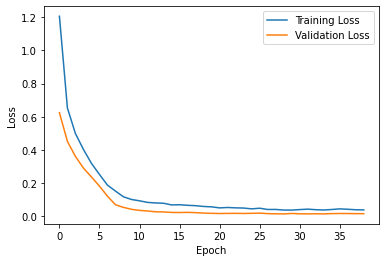

206/206 [==============================] - 0s 1ms/step
Test Accuracy: 0.9995432399512789
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       193
           1       1.00      1.00      1.00      2482
           2       1.00      1.00      1.00      3746
           3       1.00      0.99      1.00       147

    accuracy                           1.00      6568
   macro avg       1.00      1.00      1.00      6568
weighted avg       1.00      1.00      1.00      6568



In [160]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

import matplotlib.pyplot as plt

# Assume X_train, X_test, y_train, y_test are defined before this code snippet

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network with increased complexity and dropout
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(16, activation='relu', kernel_regularizer='l2'))  # Add another hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Increase dropout rate
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Adjust patience

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.3, callbacks=[early_stopping], verbose=2)

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the performance on the test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


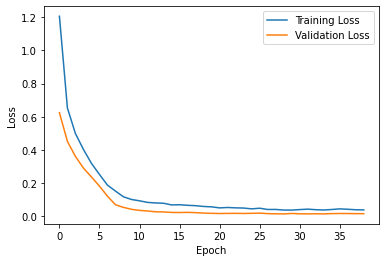

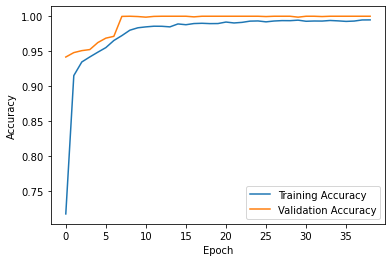

In [161]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


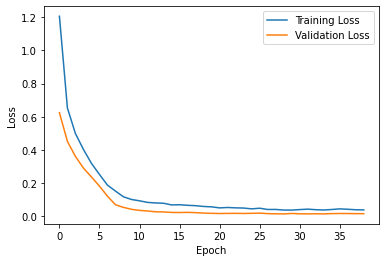

In [162]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [164]:
# Assuming 'model' is your trained neural network model

# Save the model to a file
model.save('neuro_model.h5')

# The model is now saved as 'your_model.h5' in the current working directory


In [166]:
X_train.head()

,ExpSevo,InspSevo,TOF,Count,Esmeron,Bridion,Age,Sex,SMA_TOF,EMA_TOF_Short,EMA_TOF_Long,delta_TOF,delta_TOF_relative
8358,0.00,0.00,0.0,1.0,0.0,0.0,29,1,0.00,0.00,1.87,0.0,0.00
21527,2.00,2.70,90.0,4.0,0.0,0.0,53,0,90.97,90.42,89.11,0.6,0.12
6356,1.67,2.03,37.0,4.0,0.0,0.0,35,1,12.33,21.13,18.55,37.0,7.36
17731,2.10,2.50,73.7,4.0,0.0,0.0,31,1,72.73,72.58,68.23,1.1,0.22
21747,0.00,0.00,0.0,2.0,0.0,0.0,52,0,0.00,0.00,0.05,0.0,0.00
